# EDA on Loan Approval Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('Loan_approval_data_2025.csv')
df

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CUST149995,35,Employed,4.3,39449,570,16.3,1127,7576,0,0,0,Credit Card,Education,42800,21.31,0.192,1.085,0.362,0
49996,CUST149996,34,Employed,4.4,20496,672,12.6,1478,6276,1,0,0,Credit Card,Personal,3800,18.07,0.306,0.185,0.062,0
49997,CUST149997,41,Self-Employed,4.8,18743,719,10.1,17,10331,0,0,0,Credit Card,Personal,18000,17.45,0.551,0.960,0.320,0
49998,CUST149998,38,Student,0.4,17250,633,1.3,5,7779,0,0,1,Personal Loan,Personal,1400,14.71,0.451,0.081,0.027,0


In [3]:
df.columns

Index(['customer_id', 'age', 'occupation_status', 'years_employed',
       'annual_income', 'credit_score', 'credit_history_years',
       'savings_assets', 'current_debt', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'product_type',
       'loan_intent', 'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status'],
      dtype='object')

In [4]:
df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


In [5]:
df.tail()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
49995,CUST149995,35,Employed,4.3,39449,570,16.3,1127,7576,0,0,0,Credit Card,Education,42800,21.31,0.192,1.085,0.362,0
49996,CUST149996,34,Employed,4.4,20496,672,12.6,1478,6276,1,0,0,Credit Card,Personal,3800,18.07,0.306,0.185,0.062,0
49997,CUST149997,41,Self-Employed,4.8,18743,719,10.1,17,10331,0,0,0,Credit Card,Personal,18000,17.45,0.551,0.960,0.320,0
49998,CUST149998,38,Student,0.4,17250,633,1.3,5,7779,0,0,1,Personal Loan,Personal,1400,14.71,0.451,0.081,0.027,0
49999,CUST149999,53,Employed,17.2,46923,695,15.0,8332,2655,0,1,0,Personal Loan,Personal,41000,12.39,0.057,0.874,0.291,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [7]:
df.describe()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.957060,7.454868,50062.892040,643.614820,8.168274,3595.619400,14290.442220,0.053480,0.55464,0.147640,33041.874000,15.498591,0.285724,0.701999,0.233995,0.550460
std,11.118603,7.612097,32630.501014,64.731518,7.207552,13232.399398,13243.757493,0.224991,0.84505,0.412996,26116.185102,4.067942,0.159787,0.465788,0.155268,0.497452
min,18.000000,0.000000,15000.000000,348.000000,0.000000,0.000000,60.000000,0.000000,0.00000,0.000000,500.000000,6.000000,0.002000,0.008000,0.003000,0.000000
25%,26.000000,1.300000,27280.500000,600.000000,2.000000,130.000000,5581.000000,0.000000,0.00000,0.000000,12300.000000,12.180000,0.161000,0.333000,0.111000,0.000000
50%,35.000000,4.900000,41607.500000,643.000000,6.100000,568.000000,10385.000000,0.000000,0.00000,0.000000,26100.000000,15.440000,0.265000,0.622000,0.207000,1.000000
75%,43.000000,11.400000,62723.250000,687.000000,12.600000,2271.000000,18449.250000,0.000000,1.00000,0.000000,48500.000000,18.870000,0.389000,1.010250,0.337000,1.000000
max,70.000000,39.900000,250000.000000,850.000000,30.000000,300000.000000,163344.000000,1.000000,9.00000,4.000000,100000.000000,23.000000,0.800000,2.001000,0.667000,1.000000


In [8]:
df.describe(include = 'object')

,customer_id,occupation_status,product_type,loan_intent
count,50000,50000,50000,50000
unique,50000,3,3,6
top,CUST149983,Employed,Credit Card,Personal
freq,1,34971,22455,12429


In [9]:
# check for inconsistent values

for i in df.columns:
    if df[i].nunique() != len(df[i]):
        print(i)
        print(df[i].unique())
        print("-" * 100)
        print()

age
[40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 70 62 60 56 54 49 59 58 55
 65 66 63 68 69]
----------------------------------------------------------------------------------------------------

occupation_status
['Employed' 'Student' 'Self-Employed']
----------------------------------------------------------------------------------------------------

years_employed
[17.2  7.3  1.1  0.5 12.5 13.4 22.9  4.2  5.9  7.   5.   1.3  0.   1.
  0.4  5.3  5.4 31.3 16.9  0.3  6.8  2.9  6.2 12.9 21.5 10.7  3.9 18.7
  4.7  0.2  1.2 19.1  3.2 10.   4.6 17.4  7.8 10.8 19.3  3.6  2.1  8.8
  3.3  1.8  4.1  1.9  2.6  8.3  7.1 20.4 17.3 14.2 33.1  3.8  5.6  8.2
  9.  11.4  6.6  4.8  2.4 13.6  9.7  8.4 11.3  6.4 26.6 10.6 14.8  5.2
 16.4 13.3 18.4 21.4  0.8 17.5  9.8 38.2  0.1  3.4  9.6  1.4 18.1  2.2
 15.2 10.5  3.5  3.7  1.7 17.8  6.7 23.5 18.5  1.5 14.7 17.   4.4  6.1
 21.9 34.1  6.9  8.9 13.  13.1 19.2 11.7  8.6  0.7 11.5 14.3 

In [10]:
df.isnull().sum()

customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
bins = [18,30,40,50,60,70]

label = ['18-29', '30-39', '40-49', '50-59', '60+']

df['Age_group'] = pd.cut(df['age'], labels = label, bins = bins)
df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,...,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status,Age_group
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,...,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1,30-39
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,...,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0,30-39
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,...,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1,40-49
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,...,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1,50-59
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,...,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1,30-39


In [13]:
df['annual_income'].sort_values()

5247      15000
21692     15000
21672     15000
40269     15000
40270     15000
          ...  
1033     250000
25447    250000
18896    250000
49918    250000
24312    250000
Name: annual_income, Length: 50000, dtype: int64

In [14]:
bins = [15000,50000,100000,150000,200000,250000]

label = ['15k - 50k', '50k - 1L', '1L - 1.5L', '1.5L - 2L', '2L - 2.5L']

df['Income_level'] = pd.cut(df['annual_income'], labels = label, bins = bins)
df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,...,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status,Age_group,Income_level
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,...,Credit Card,Business,600,17.02,0.423,0.023,0.008,1,30-39,15k - 50k
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,...,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0,30-39,15k - 50k
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,...,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1,40-49,15k - 50k
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,...,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1,50-59,15k - 50k
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,...,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1,30-39,50k - 1L


In [15]:
import numpy as np

df['loan_label'] = np.where(df['loan_status'] == 1, 'Approved', 'Rejected')
df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,...,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status,Age_group,Income_level,loan_label
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,...,Business,600,17.02,0.423,0.023,0.008,1,30-39,15k - 50k,Approved
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,...,Home Improvement,53300,14.10,0.384,1.237,0.412,0,30-39,15k - 50k,Rejected
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,...,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1,40-49,15k - 50k,Approved
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,...,Business,2900,18.74,0.398,0.099,0.033,1,50-59,15k - 50k,Approved
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,...,Education,99600,13.92,0.195,1.565,0.522,1,30-39,50k - 1L,Approved


# ~Loan Characteristics


### loans approved vs rejected overall

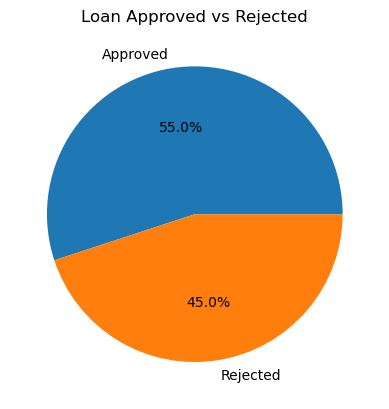

In [16]:
count = df['loan_status'].value_counts()
label = ['Approved','Rejected']

plt.pie(count, labels = label, autopct = '%1.1f%%')
plt.title('Loan Approved vs Rejected')
plt.show()

#### CONCLUSION
- The chart shows the percentage of loans that were approved compared to those that were rejected.
- As the approved section is larger, it means most people were able to get their loans successfully.


### Average credit_score for approved loans

In [17]:
loan_approved = df.groupby('loan_label')['credit_score'].mean().reset_index()
loan_approved
loan_approved

,loan_label,credit_score
0,Approved,672.647749
1,Rejected,608.064110


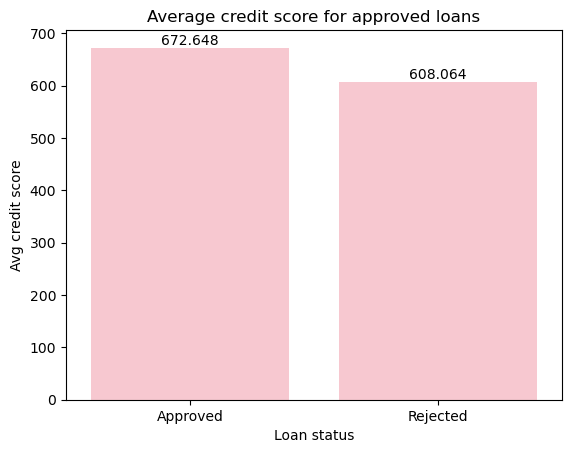

In [18]:
k = sns.barplot(data = loan_approved , x = 'loan_label', y = 'credit_score', color = 'pink' )

for i in k.containers:
    k.bar_label(i)


plt.title('Average credit score for approved loans')
plt.xlabel('Loan status')
plt.ylabel('Avg credit score')
plt.show()

#### CONCLUSION
- The chart compares the average credit score of people whose loans were approved vs those whose loans were rejected.
- people with higher credit scores are more likely to have their loans approved.
- On the other hand, people with lower credit scores face more rejections.


# ~Customer Profile Insights

### Average age of approved vs rejected customers

<Figure size 1000x500 with 0 Axes>

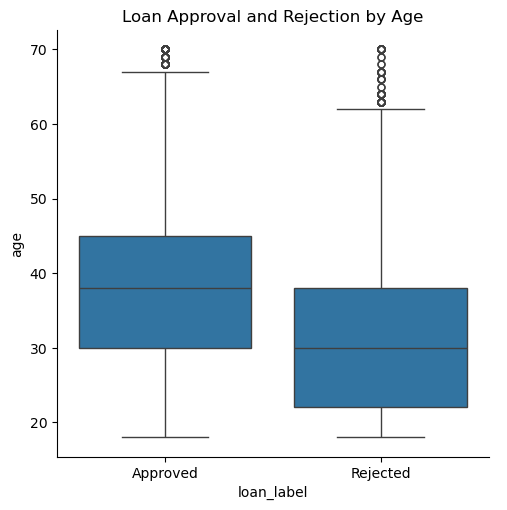

In [19]:

plt.figure(figsize = (10,5))

sns.catplot(data = df, x ='loan_label', y = 'age',kind = 'box')
plt.title('Loan Approval and Rejection by Age')
plt.show()

#### CONCLUSION
- The chart compares the ages of people whose loans were approved with those whose loans were rejected.
- From the box plot, we can see the range of ages in both groups, including the youngest, oldest, and the average age.
- Approved loans shows a higher age range, it means age may influence loan decisions.


## loan applications by occupation_status

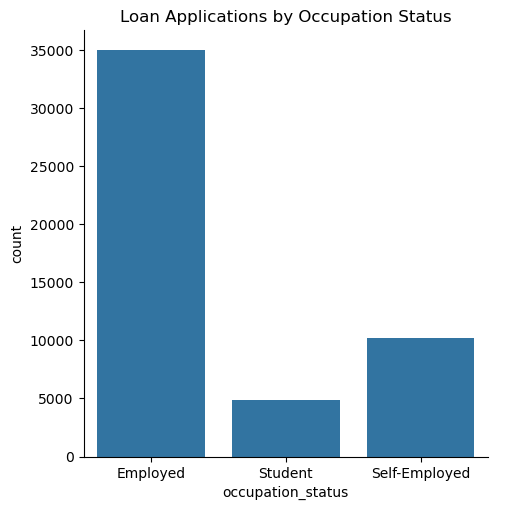

In [20]:
sns.catplot(data = df, x = 'occupation_status', kind = 'count')

plt.title("Loan Applications by Occupation Status")
plt.show()

#### CONCLUSION
- The chart shows how many people from different occupations applied for loans.
- As employed people have more applications, meaning people who are employed are applying for loans more often.
- Students have fewer applications, meaning loan demand is lower in this groups.


## Do higher income customers get approved more?


In [21]:
#df.columns

In [22]:
# Approval rate using existing Income_level column  
income_approval = df.groupby('Income_level',observed=True)['loan_status'].mean() * 100

print("Approval Rate by Income Level (%):")
print(income_approval)


Approval Rate by Income Level (%):
Income_level
15k - 50k    50.382572
50k - 1L     60.887466
1L - 1.5L    71.638225
1.5L - 2L    76.402878
2L - 2.5L    82.914573
Name: loan_status, dtype: float64


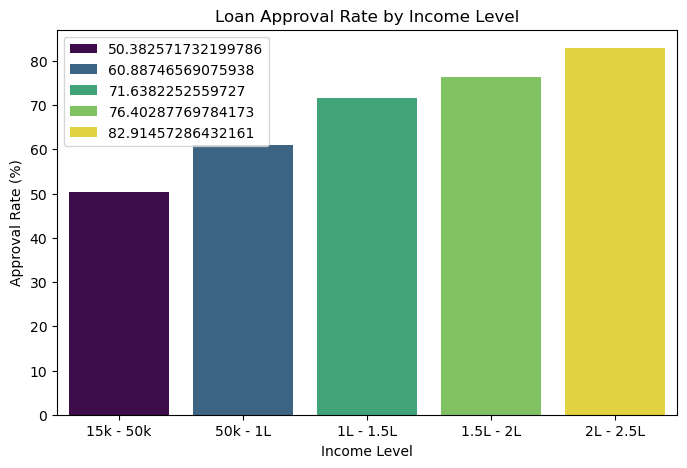

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=income_approval.index, y=income_approval.values, palette='viridis', hue = income_approval)

plt.ylabel("Approval Rate (%)")
plt.xlabel("Income Level")
plt.title("Loan Approval Rate by Income Level")
plt.legend(loc = 'best')
plt.show()


#### CONCLUSION
- The chart compares loan approval rates across different income levels.
- People with higher income levels generally have a better chance of loan approval.
- Lower income groups show lower approval rates, meaning they face more rejections.


## Which age group applies for most loans?

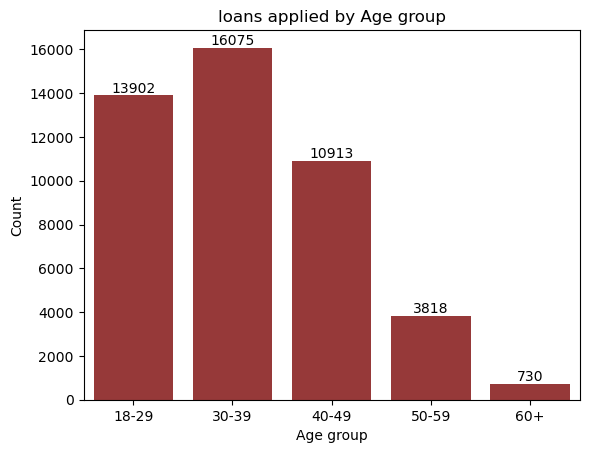

In [24]:
A = sns.countplot(data = df , x ='Age_group', color = 'brown')

for i in A.containers:
    A.bar_label(i)
    
plt.title('loans applied by Age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

#### CONCLUSION
- The chart shows how many people in each age group applied for loans.
- 18-29 and 30-39 age groups have more applications, meaning people in these age range are more active in seeking loans.
- Other age groups have fewer applications, meaning loan demand is lower among them.


## How many customers have defaults_on_file = Yes?

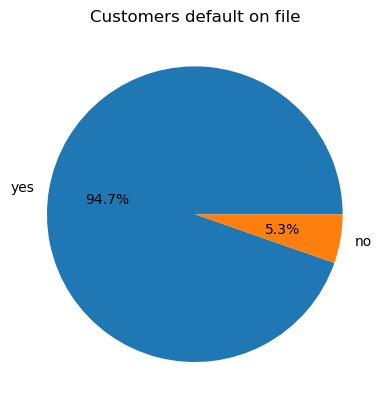

In [25]:
counts = df['defaults_on_file'].value_counts()
label = ['yes','no']

plt.pie(counts , labels = label, autopct = '%1.1f%%')
plt.title('Customers default on file')
plt.show()

#### CONCLUSION
- The chart shows that 94.7% of customers have a default on file, meaning they failed to repay a loan or credit in the past.
- Only 5.3% of customers have no default history, which is a very small group.
- This tells us that most applicants in the dataset are high-risk borrowers because they already have repayment issues.


# ~Loan Intent & Product Behavior

### What % of loans get approved for each loan_intent?


In [26]:
approval_rate = (df.groupby('loan_intent')['loan_status'].mean() * 100).reset_index()
approval_rate.columns = ['loan_intent', 'Approval_%']
approval_rate

,loan_intent,Approval_%
0,Business,44.343286
1,Debt Consolidation,36.648363
2,Education,67.505427
3,Home Improvement,53.522072
4,Medical,52.895499
5,Personal,60.825489


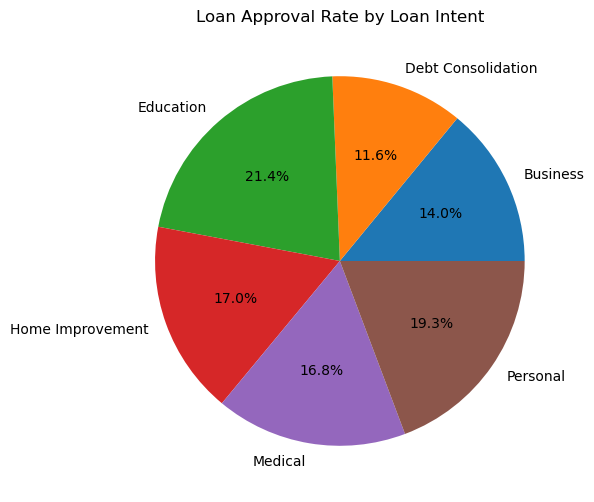

In [27]:
plt.figure(figsize=(6,6))

plt.pie(approval_rate['Approval_%'], labels = approval_rate['loan_intent'], autopct='%1.1f%%')

plt.title("Loan Approval Rate by Loan Intent")
plt.show()

#### CONCLUSION
- The chart divides approvals into different loan purposes.
- Some loan intents (like education or personal loans) have higher approval percentages, meaning banks are more willing to approve those.
- Other intents (like Business and Dept Consolidation) may have lower approval percentages, meaning they are riskier for banks.


## What is average debt_to_income_ratio for approved loans?

In [28]:
df.groupby('loan_label')['debt_to_income_ratio'].mean().reset_index()

,loan_label,debt_to_income_ratio
0,Approved,0.239898
1,Rejected,0.341838


<function matplotlib.pyplot.show(close=None, block=None)>

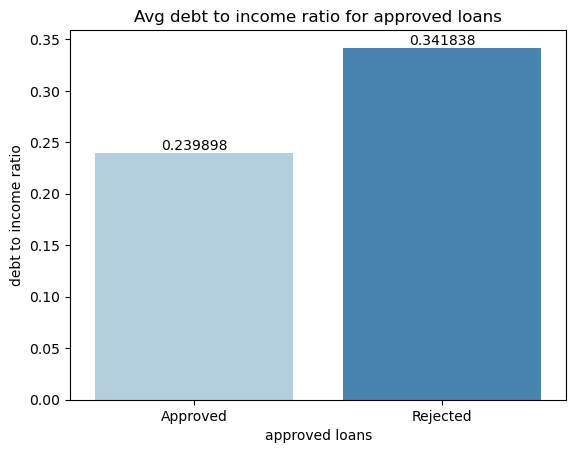

In [29]:
D = sns.barplot(data = df, x = 'loan_label' , y = 'debt_to_income_ratio' , palette = 'Blues' , hue = 'loan_label' ,
               errorbar = None)


for i in D.containers:
    D.bar_label(i)


plt.title('Avg debt to income ratio for approved loans')
plt.xlabel('approved loans')
plt.ylabel('debt to income ratio')
plt.show

#### CONCLUSION
- The chart compares the debt-to-income ratio of people whose loans were approved versus those whose loans were rejected.
- A lower debt-to-income ratio means the person has less debt compared to their income, which makes them safer borrowers.
- A higher debt-to-income ratio means the person has more debt compared to their income, which makes them riskier borrowers.
- From the chart, we can see that approved loans usually belong to people with lower debt-to-income ratios, while rejected loans are linked to higher ratios.


## Product Type Distribution by occupation status of customers

In [30]:
#df.columns

In [31]:
df.groupby('product_type')['occupation_status'].value_counts().reset_index()

,product_type,occupation_status,count
0,Credit Card,Employed,15686
1,Credit Card,Self-Employed,4524
2,Credit Card,Student,2245
3,Line of Credit,Employed,7056
4,Line of Credit,Self-Employed,2036
5,Line of Credit,Student,930
6,Personal Loan,Employed,12229
7,Personal Loan,Self-Employed,3619
8,Personal Loan,Student,1675


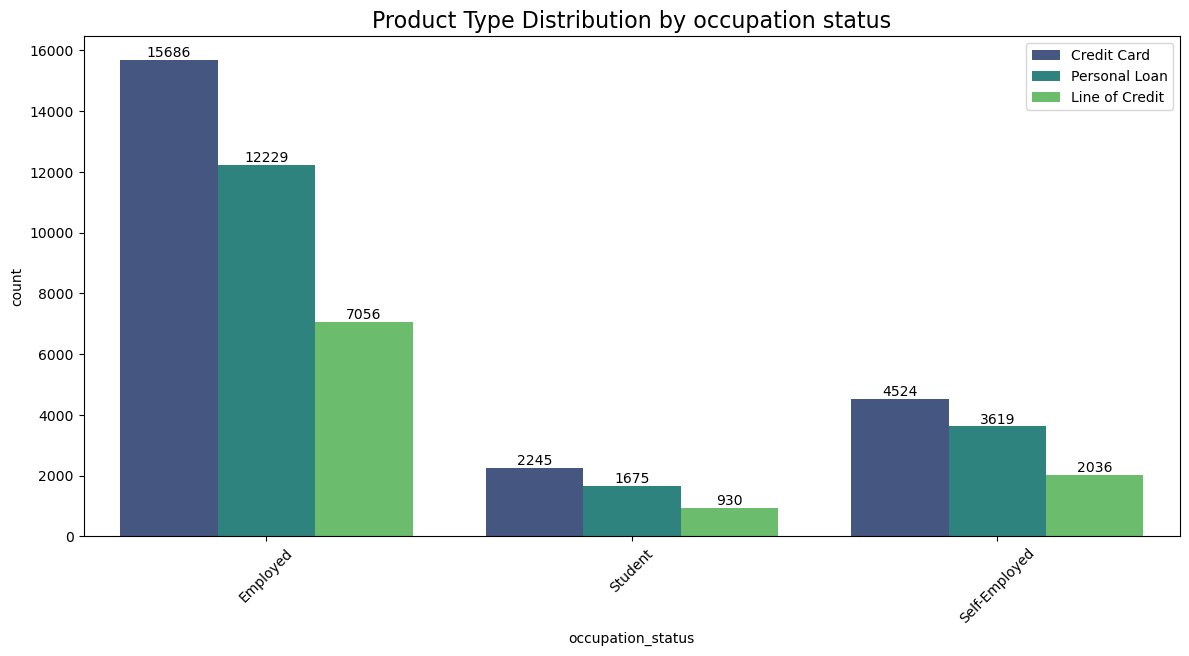

In [32]:
plt.figure(figsize = (12,6))

E = sns.countplot(data = df, x = 'occupation_status', hue =  'product_type', palette = 'viridis')

for i in E.containers:
    E.bar_label(i)

plt.title('Product Type Distribution by occupation status', fontsize = 16)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.legend(loc = 'best')

#### CONCLUSION
- The table shows how different loan products are distributed across occupation groups.
- Employed people apply for the highest number of loans across all product types.
- Self-employed people apply less than employed people but still show significant demand, especially for Credit Cards and Personal Loans.
- Students have the lowest counts overall, but they still apply for Credit Cards and Personal Loans.


## Which loan products have the highest interest_rate?

In [33]:
df.groupby('product_type')['interest_rate'].max()

product_type
Credit Card       23.0
Line of Credit    15.0
Personal Loan     17.0
Name: interest_rate, dtype: float64

<Figure size 1000x500 with 0 Axes>

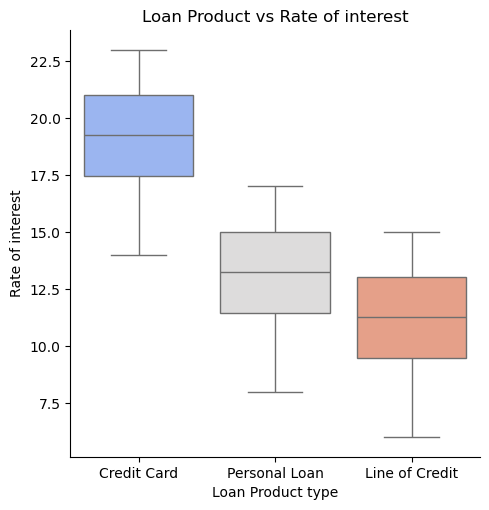

In [34]:

plt.figure(figsize = (10,5))

sns.catplot(data = df, x ='product_type', y = 'interest_rate',kind = 'box', palette ='coolwarm', hue = 'product_type')
plt.title('Loan Product vs Rate of interest')
plt.xlabel('Loan Product type')
plt.ylabel('Rate of interest')
plt.show()

#### CONCLUSION
- The chart compares the interest rates charged for different loan products.
- Each box shows the range of interest rates for that product, including the lowest, highest, and average values.
- Some products (like Credit Cards) usually have higher interest rates, making them more expensive for borrowers.
- Other products (like Personal Loans or Lines of Credit) may have lower or more stable interest rates, making them more affordable.
- In simple words, This chart tells us which loan products are costlier and which ones are cheaper based on interest rates.





# overall loan approval rate by age group and occupation status

In [ ]:
#df.columns

In [ ]:
#df['loan_status'].unique()

In [45]:
approval_rate = (df.groupby(['Age_group','Income_level', 'occupation_status'], observed=False)['loan_status'].mean().reset_index())
approval_rate

,Age_group,Income_level,occupation_status,loan_status
0,18-29,15k - 50k,Employed,0.387599
1,18-29,15k - 50k,Self-Employed,0.402711
2,18-29,15k - 50k,Student,0.461622
3,18-29,50k - 1L,Employed,0.461205
4,18-29,50k - 1L,Self-Employed,0.417073
...,...,...,...,...
70,60+,1.5L - 2L,Self-Employed,1.000000
71,60+,1.5L - 2L,Student,NaN
72,60+,2L - 2.5L,Employed,1.000000
73,60+,2L - 2.5L,Self-Employed,1.000000


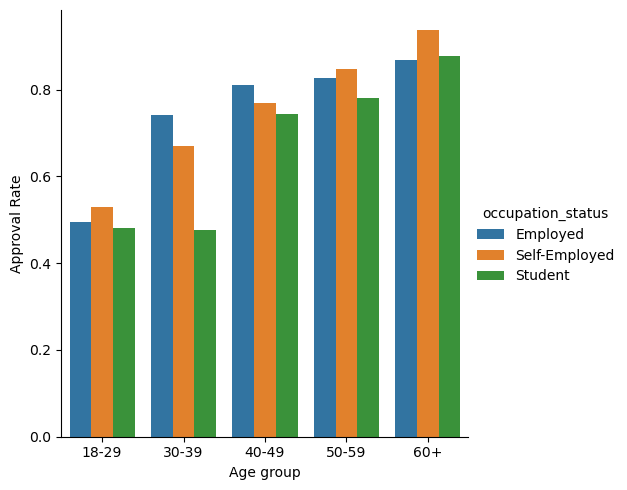

In [46]:
sns.catplot(data = approval_rate , x = 'Age_group', y = 'loan_status', hue = 'occupation_status', kind = 'bar', errorbar = None)

plt.xlabel('Age group')
plt.ylabel('Approval Rate')
plt.show()

#### CONCLUSION
- The chart compares loan approval rates across different age groups, while also showing differences between occupation statuses.
- Some age groups have higher approval rates, meaning people in that age range are more likely to get loans.
- Occupation also matters:
- Employed people usually have the highest approval rates.
- Self-employed people may face more rejections because their income is less stable.
- Students often have the lowest approval rates since they have limited income or credit history.


# overall loan approval rate by age group, income level, and occupation status

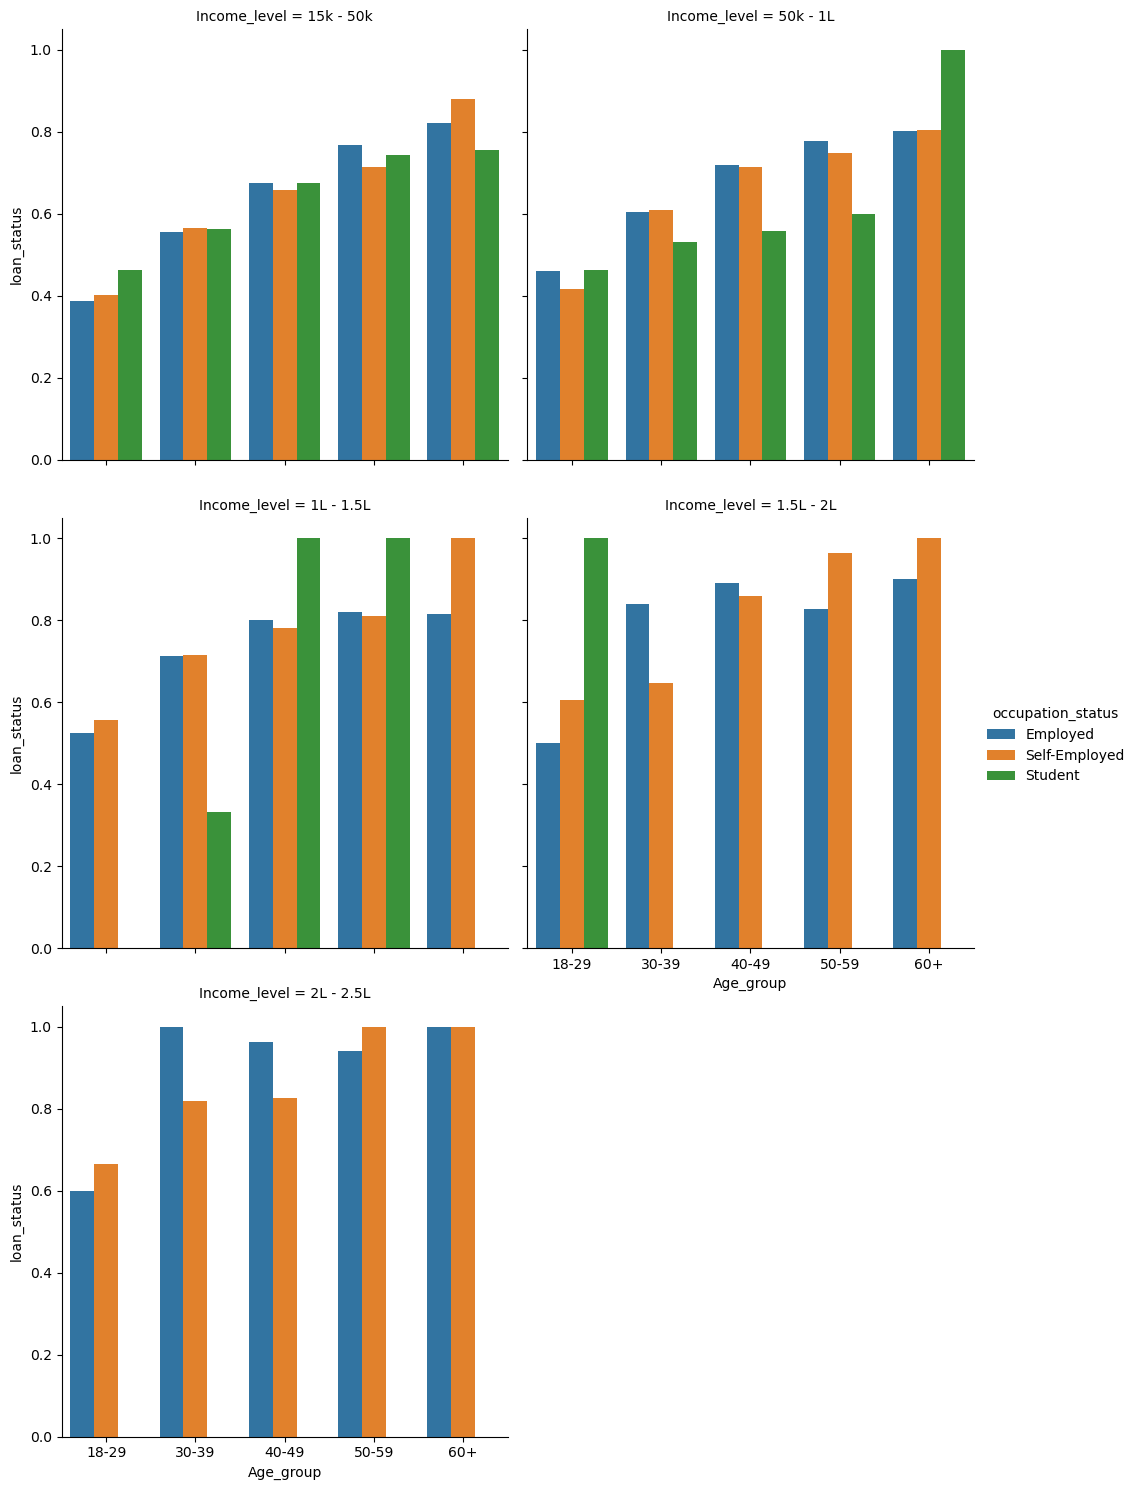

In [47]:
sns.catplot(
    data=approval_rate,
    x='Age_group',
    y='loan_status',
    hue='occupation_status',
    col='Income_level',
    kind='bar',
    col_wrap=2
)


#### CONCLUSION
- The chart shows how loan approval rates change when we look at age, job type, and income together.
- Income level is a strong factor: higher income groups usually have better approval rates across all ages and occupations.
- Occupation status also matters:
- Employed people generally have the highest approval rates.
- Self-employed people often face lower approval chances.
- Students usually have the lowest approval rates.
- Age groups show differences too: middle-aged groups often have higher approval rates compared to very young or very old groups.


## How do income, credit score, and loan amount together influence loan approval status


In [44]:
#df.columns

<Figure size 2000x1000 with 0 Axes>

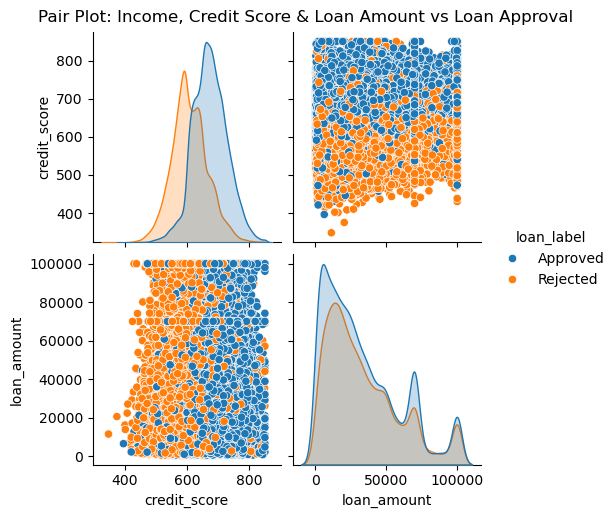

In [49]:
plt.figure(figsize = (20,10))

pair_data = df[['Income_level', 'credit_score', 'loan_amount', 'loan_label']]

sns.pairplot(
    data=pair_data,
    hue='loan_label',
    diag_kind='kde')

plt.suptitle("Pair Plot: Income, Credit Score & Loan Amount vs Loan Approval", y=1.02)
plt.show()

#### CONCLUSION
- Higher credit scores are strongly associated with approved loans, while lower scores tend to correlate with rejections.
- Loan amount shows a moderate influence — approved loans are more common at mid-range amounts, while very high or very low amounts show mixed outcomes.
- Combined effect: Applicants with high credit scores and moderate loan amounts have the highest approval likelihood.
- Distribution overlap: Some rejected loans still have decent credit scores, suggesting other factors may also influence decisions
